In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
            Peter F. Grinde-Hollevik <br>
        Akhil Venkatesh <br>
</table>

# Lecture Notebook 3: A Quick Look at the Inverse Demand Curves for Beer

Let's start off by pulling in open source data on beer sales from [The University of Chicago Booth School of Business](https://www.chicagobooth.edu/research/kilts/datasets/dominicks).

In [2]:
df = pd.read_csv('s_wber.csv')
df

,STORE,UPC,WEEK,MOVE,QTY,PRICE,SALE,PROFIT,OK
0,2,294,298,11,1,2.62,NaN,-18.83,1
1,2,294,299,9,1,2.51,NaN,18.47,1
2,2,294,300,6,1,2.49,NaN,13.60,1
3,2,294,301,5,1,2.99,NaN,-67.89,1
4,2,294,302,1,1,2.49,NaN,13.60,1
...,...,...,...,...,...,...,...,...,...
1999996,101,7199011600,177,6,1,11.99,NaN,1.16,1
1999997,101,7199011600,178,5,1,10.99,B,-7.82,1
1999998,101,7199011600,179,2,1,11.99,NaN,1.16,1
1999999,101,7199011600,180,3,1,11.99,NaN,1.16,1


One way that I like to approach a dataset where I don't know the specific details of it is to first summarize the whole table, then delve deeper into each feature. Here's a quick example of my approach:

In [3]:
len(np.unique(df['UPC'])) # 365 unique beers

365

In [4]:
len(np.unique(df['STORE'])) # 89 unique stores

89

In [5]:
len(np.unique(df['WEEK'])) # 89 unique stores # 303 unique weeks

303

In [6]:
df['PRICE'].mean() # average beer price

3.08277509889023

In [7]:
df['PRICE'].max() # most expensive beer

29.64

In [8]:
df['PRICE'].min() # FREE BEER?! yes please!

0.0

In [9]:
df['QTY'].mean() # avg amount of beers bought

1.00000149999925

Can you tell what this plot is showing below? I'm not sure if I can!

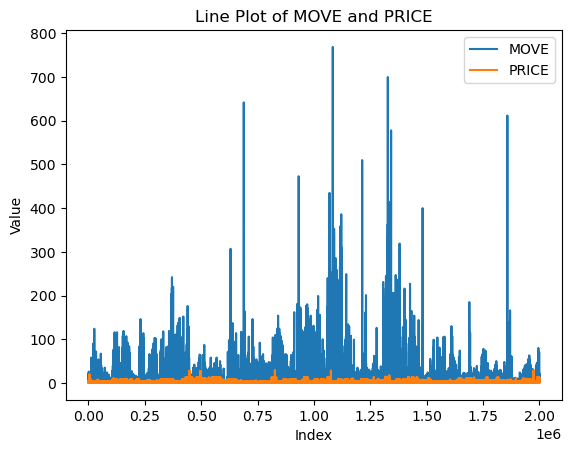

In [10]:
move = df['MOVE']
price = df['PRICE']

plt.plot(move, label='MOVE')
plt.plot(price, label='PRICE')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of MOVE and PRICE')
plt.legend()
plt.show()

In [11]:
df['QUANTITY'] = df['MOVE'] # Interestingly enough, quantity is not denoted as QTY, by 'MOVE'.

By now, we should be aware that we're looking at a dataset of beer sales, where the respective price and quantities for each transaction is represented. Let's filter out all the free beer - although it would be very nice to keep that!

In [12]:
no_free_beer = df[['QUANTITY','PRICE']]
no_free_beer = no_free_beer[no_free_beer['PRICE']>0]
no_free_beer

,QUANTITY,PRICE
0,11,2.62
1,9,2.51
2,6,2.49
3,5,2.99
4,1,2.49
...,...,...
1999996,6,11.99
1999997,5,10.99
1999998,2,11.99
1999999,3,11.99


 To create the demand curve itself, we need to remember that we're looking for quantity demanded at each given price. Hence, we group by price and 'ask' for the sum at the given price. Then, flip that around (just trick), and do the cumulative sum (since a demand curve is cumulative), and then flip it around one last time (since we're looking at the inverse demand curve).

In [13]:
demand = np.flip(np.cumsum(np.flip(no_free_beer.groupby('PRICE')['QUANTITY'].sum())))
demand = demand.to_frame().reset_index()
demand

,PRICE,QUANTITY
0,0.99,8633454
1,1.00,8606517
2,1.02,8605080
3,1.04,8605062
4,1.05,8604641
...,...,...
1109,25.65,291
1110,26.99,287
1111,28.35,95
1112,28.50,93


Now, let's visualize the inverse demand curve for all beers!

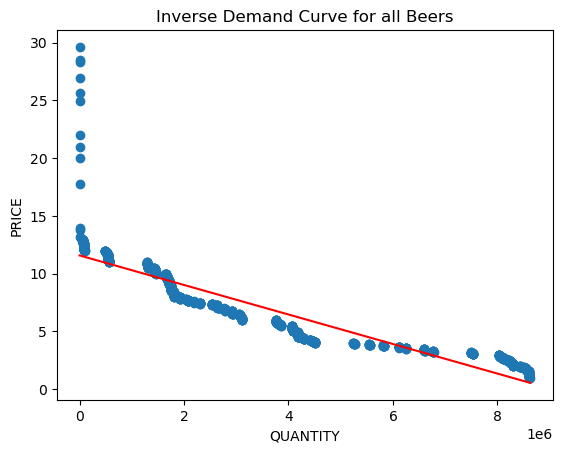

In [28]:
plt.scatter(demand['QUANTITY'], demand['PRICE'])
m, b = np.polyfit(demand['QUANTITY'], demand['PRICE'], 1)
plt.plot(demand['QUANTITY'], m * demand['QUANTITY'] + b, color='red')
plt.title('Inverse Demand Curve for all Beers')
plt.xlabel('QUANTITY')
plt.ylabel('PRICE')
plt.show()

This is pretty cool! Hover over the line to see the Ordinary Least Squares approximation of the inverse demand curve. What does it tell you?

Now, do you expect the price elasticity of demand to differ for different prices? Yes! Usually, a more expensive good (luxury beers?) tend to have a higher PED. Could we visualize this?

In [15]:
demand.describe()

,PRICE,QUANTITY
count,1114.000000,1.114000e+03
mean,7.277945,3.363395e+06
std,3.785409,2.661893e+06
min,0.990000,3.600000e+01
25%,4.202500,1.439125e+06
50%,7.025000,2.674982e+06
75%,10.285000,4.422560e+06
max,29.640000,8.633454e+06


Let's plot multiple demand curves for different price segments of beer. We could start with all beers above the mean. Let's call them expensive.

In [16]:
demand['EXPENSIVE'] = demand['PRICE']>demand['PRICE'].mean()
demand.head(5)

,PRICE,QUANTITY,EXPENSIVE
0,0.99,8633454,False
1,1.00,8606517,False
2,1.02,8605080,False
3,1.04,8605062,False
4,1.05,8604641,False


Before you plot, think about how this curve might differ from the previous one. Then, check if your intuition was right!

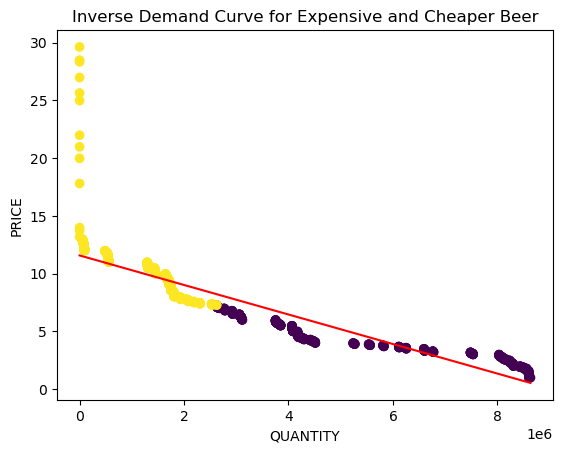

In [32]:
plt.scatter(demand['QUANTITY'], demand['PRICE'], c=demand['EXPENSIVE'])
m, b = np.polyfit(demand['QUANTITY'], demand['PRICE'], 1)
plt.plot(demand['QUANTITY'], m * demand['QUANTITY'] + b, color='red')
plt.title('Inverse Demand Curve for Expensive and Cheaper Beer')
plt.xlabel('QUANTITY')
plt.ylabel('PRICE')
plt.show()

Did your economic intuition help you? Now, what's happening with the really expensive beer? 

In [18]:
demand['REALLY EXPENSIVE'] = demand['PRICE']>10.5 #75th Percentile of Price
demand.head(5)

,PRICE,QUANTITY,EXPENSIVE,REALLY EXPENSIVE
0,0.99,8633454,False,False
1,1.00,8606517,False,False
2,1.02,8605080,False,False
3,1.04,8605062,False,False
4,1.05,8604641,False,False


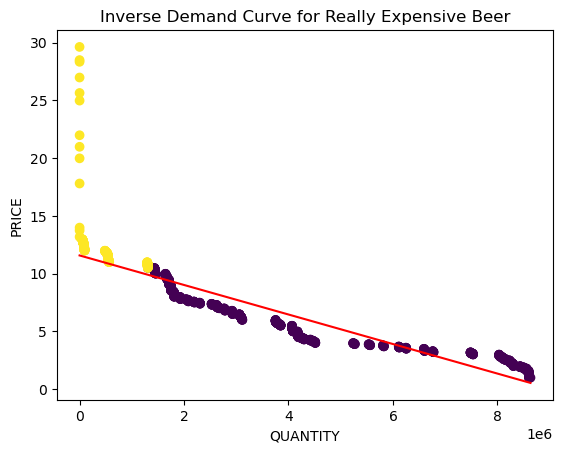

In [34]:
plt.scatter(demand['QUANTITY'], demand['PRICE'], c=demand['REALLY EXPENSIVE'])
m, b = np.polyfit(demand['QUANTITY'], demand['PRICE'], 1)
plt.plot(demand['QUANTITY'], m * demand['QUANTITY'] + b, color='red')
plt.title('Inverse Demand Curve for Really Expensive Beer')
plt.xlabel('QUANTITY')
plt.ylabel('PRICE')
plt.show()

And the really, really expensive beer?

In [20]:
demand['REALLY, REALLY EXPENSIVE'] = demand['PRICE']>15
demand.head(5)

,PRICE,QUANTITY,EXPENSIVE,REALLY EXPENSIVE,"REALLY, REALLY EXPENSIVE"
0,0.99,8633454,False,False,False
1,1.00,8606517,False,False,False
2,1.02,8605080,False,False,False
3,1.04,8605062,False,False,False
4,1.05,8604641,False,False,False


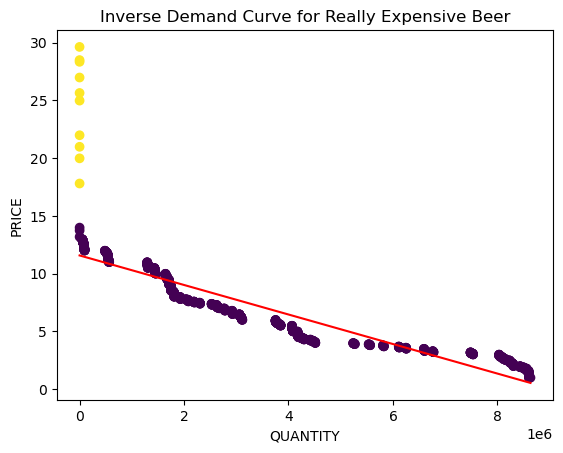

In [35]:
plt.scatter(demand['QUANTITY'], demand['PRICE'], c=demand['REALLY, REALLY EXPENSIVE'])
m, b = np.polyfit(demand['QUANTITY'], demand['PRICE'], 1)
plt.plot(demand['QUANTITY'], m * demand['QUANTITY'] + b, color='red')
plt.title('Inverse Demand Curve for Really Expensive Beer')
plt.xlabel('QUANTITY')
plt.ylabel('PRICE')
plt.show()

This notebook should have given you the data science skills to plot up simple, but powerful inverse demand curves. It should have also gotten you thinking about how demand curves differ for different price segments for the same goods.